# MFW 6 + flopy + matplotlib

**Autor: Luis M. de la Cruz**

<font color=#FF0000>**Última actualización: Mon Apr 15 06:37:49 PM UTC 2024**</font>

## Paso 1. Importamos las bibliotecas
Importamos todas las bibliotecas `os` (para acceso al sistema operativo), `numpy` para manejo de arreglos, `matplotlib` para graficación y `flopy`.

In [ ]:
# Cuando trabajas en MACTI, debes forzosamente instalar flopy como sigue 
# (descomenta la línea siguiente):
!pip install flopy

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import flopy

## Paso 2. Definimos la ruta de MODFLOW
Definimos la ruta donde se encuentra el ejecutable de MODFLOW 6 y el nombre de la simulación.

In [2]:
ws = os.getcwd() # Ruta de donde estamos actualmente

# A continuación modifica la línea correspondiente, de acuerdo con tu sistema
# operativo y tu ambiente. La variable mf6_exe define la ruta del ejecutable 
# de MODFLOW6

# WINDOWS
#mf6_exe = 'C:\\Users\\luiggi\\Downloads\\mf6.4.2\\mf6.4.2_win64\\bin\\mf6.exe'

# MAC 
#mf6_exe = '/Users/luiggi/GitSites/mf6.4.4_mac/bin/mf6'

# LINUX (MACTI) 
mf6_exe = '/home/jovyan/GMMC/WMA/mf6/bin/mf6'

# Definimos el nombre de la simulación
name = 'quick_start'

print(' Ruta hacia el ejecutable de MODFLOW 6 : {} '.format(mf6_exe))
print(' Nombre de esta simulación: {}'.format(name))

 Ruta hacia el ejecutable de MODFLOW 6 : /home/jovyan/GMMC/WMA/mf6/bin/mf6 
 Nombre de esta simulación: quick_start


## Paso 3. Objeto para la simulación
Creamos un objeto de tipo `MFSimulation`

In [3]:
sim  = flopy.mf6.MFSimulation(sim_name=name, sim_ws=ws, exe_name=mf6_exe)

In [4]:
print(type(sim),'\n')
print(sim)

<class 'flopy.mf6.modflow.mfsimulation.MFSimulation'> 

sim_name = quick_start
sim_path = /home/jovyan/GMMC/WMA/notebooks/0_Ejemplo_base
exe_name = /home/jovyan/GMMC/WMA/mf6/bin/mf6

###################
Package mfsim.nam
###################

package_name = mfsim.nam
filename = mfsim.nam
package_type = nam
model_or_simulation_package = simulation
simulation_name = quick_start





## Paso 4. Objeto para el tiempo
Creamos un objeto de tipo `ModflowTDis` para la discretización en el tiempo

In [5]:
tdis = flopy.mf6.ModflowTdis(sim)

In [6]:
print(type(tdis),'\n')
print(tdis)

<class 'flopy.mf6.modflow.mftdis.ModflowTdis'> 

package_name = quick_start.tdis
filename = quick_start.tdis
package_type = tdis
model_or_simulation_package = simulation
simulation_name = quick_start

Block dimensions
--------------------
nper
{internal}
(1)


Block perioddata
--------------------
perioddata
{internal}
([(1., 1, 1.)])





In [7]:
# Escribo los datos definidos hasta ahora en los archivos correspondientes
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...


## Paso 5. Objeto para la solución.

Creamos un objeto de tipo `ModflowIms` para la solución iterativa

In [8]:
ims  = flopy.mf6.ModflowIms(sim)

In [9]:
print(type(ims), '\n')
print(ims)

<class 'flopy.mf6.modflow.mfims.ModflowIms'> 

package_name = ims_-1
filename = quick_start.ims
package_type = ims
model_or_simulation_package = simulation
simulation_name = quick_start




In [10]:
# Escribo los datos definidos hasta ahora en los archivos correspondientes
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...


## Paso 6. Objeto para el modelo de flujo
Creamos un modelo de flujo usando `ModflowGwf`

In [11]:
gwf  = flopy.mf6.ModflowGwf(sim, modelname=name, save_flows=True)

In [12]:
print(type(gwf), '\n')
print(gwf)

<class 'flopy.mf6.modflow.mfgwf.ModflowGwf'> 

name = quick_start
model_type = gwf6
version = mf6
model_relative_path = .




In [13]:
# Escribo los datos definidos hasta ahora en los archivos correspondientes
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model quick_start...
    writing model name file...


## Paso 7. Objeto para la malla

Creamos un objeto para la discretización espacial
En Modflow 6 existen tres maneras:
- DIS (ModflowGwfdis) - Structured discretization
- DISV (ModflowGwfdisv) - Discretization with vertices
- DISU (ModflowGwfdisu) - Unstructured discretization

In [14]:
nrow = 10
ncol = 10
dis  = flopy.mf6.ModflowGwfdis(gwf, nrow=nrow, ncol=ncol)

In [15]:
print(type(dis), '\n')
print(dis)

<class 'flopy.mf6.modflow.mfgwfdis.ModflowGwfdis'> 

package_name = dis
filename = quick_start.dis
package_type = dis
model_or_simulation_package = model
model_name = quick_start

Block dimensions
--------------------
nlay
{internal}
(1)

nrow
{internal}
(10)

ncol
{internal}
(10)


Block griddata
--------------------
delr
{constant 1.0}

delc
{constant 1.0}

top
{constant 1.0}

botm
{constant 0.0}





In [16]:
# Escribo los datos definidos hasta ahora en los archivos correspondientes
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model quick_start...
    writing model name file...
    writing package dis...


## Paso 8. Condiciones iniciales

Creamos un objeto de tipo `ModflowGwfic` para las condiciones iniciales.

In [17]:
ic   = flopy.mf6.ModflowGwfic(gwf)

In [18]:
# Escribo los datos definidos hasta ahora en los archivos correspondientes
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model quick_start...
    writing model name file...
    writing package dis...
    writing package ic...


## Paso 9. Propiedades de los nodos

Creamos un objeto de tipo `ModflowGwfnpf` para definir propiedades en los nodos y otro de tipo `ModflowGwfchd` para definir la carga constante

In [19]:
npf  = flopy.mf6.ModflowGwfnpf(gwf, save_specific_discharge=True)

In [20]:
print(type(npf),'\n')
print(npf)

<class 'flopy.mf6.modflow.mfgwfnpf.ModflowGwfnpf'> 

package_name = npf
filename = quick_start.npf
package_type = npf
model_or_simulation_package = model
model_name = quick_start

Block options
--------------------
save_specific_discharge
{internal}
(True)


Block griddata
--------------------
icelltype
{constant 0}

k
{constant 1.0}





In [21]:
# Escribo los datos definidos hasta ahora en los archivos correspondientes
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model quick_start...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...


In [22]:
xc = nrow-1
yc = ncol-1
chd  = flopy.mf6.ModflowGwfchd(gwf, stress_period_data=[[(0, 0, 0), 10.],
                                                        [(0, int(xc/2), int(yc/2)), 2.5],
                                                       [(0, xc, yc), 0.]])

In [23]:
print(xc, yc)

9 9


In [24]:
print(type(chd),'\n')
print(chd)

<class 'flopy.mf6.modflow.mfgwfchd.ModflowGwfchd'> 

package_name = chd_0
filename = quick_start.chd
package_type = chd
model_or_simulation_package = model
model_name = quick_start

Block period
--------------------
stress_period_data
{0: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x7f445f1d1410>}




In [25]:
# Escribo los datos definidos hasta ahora en los archivos correspondientes
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model quick_start...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 3 based on size of stress_period_data


## Paso 10. Objeto para la salida.
Creamos un objeto de tipo `ModflowGwfoc` para la salida de la simulación

In [26]:
budget_file = name + '.bud'
head_file = name + '.hds'

oc = flopy.mf6.ModflowGwfoc(gwf,
                            budget_filerecord=budget_file,
                            head_filerecord=head_file,
                            saverecord=[('HEAD', 'ALL'), ('BUDGET', 'ALL')])


In [27]:
print(type(oc),'\n')
print(oc)

<class 'flopy.mf6.modflow.mfgwfoc.ModflowGwfoc'> 

package_name = oc
filename = quick_start.oc
package_type = oc
model_or_simulation_package = model
model_name = quick_start

Block options
--------------------
budget_filerecord
{internal}
([('quick_start.bud',)])

head_filerecord
{internal}
([('quick_start.hds',)])


Block period
--------------------
saverecord
{internal}
([('HEAD', 'ALL', None) ('BUDGET', 'ALL', None)])

printrecord
None




## Paso 11. Archivos de entrada.
Escribimos los datos de entrada para la simulación

In [28]:
# Escribo los datos definidos hasta ahora en los archivos correspondientes
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model quick_start...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package chd_0...
    writing package oc...


## Paso 12. Ejecución
Ejecutamos la simulación

In [29]:
sim.run_simulation()

FloPy is using the following executable to run the model: ../../mf6/bin/mf6
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.4.4 02/13/2024

   MODFLOW 6 compiled Feb 13 2024 16:19:58 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Government shall

(True, [])

## Paso 13. Recuperamos la salida.
Realizamos la visualización

In [30]:
# Obtenemos los resultados de la carga hidráulica
head = flopy.utils.HeadFile(os.path.join(ws, head_file)).get_data()

# Obtenemos los resultados del BUDGET
bud  = flopy.utils.CellBudgetFile(os.path.join(ws, budget_file),
                                  precision='double')

# Obtenemos las velocidades
spdis = bud.get_data(text='DATA-SPDIS')[0]
qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis, gwf)

In [31]:
# Verificamos el tipo y dimensiones de los arreglos donde
# están almacenados la carga hidráulica, el BUDGET, y la velocidad.
print('Head : ', type(head), head.shape)
print('Budget : ', type(bud), bud.shape)
print('qx : ', type(qx), qx.shape)
print('qy : ', type(qy), qy.shape)
print('qz : ', type(qz), qz.shape)

Head :  <class 'numpy.ndarray'> (1, 10, 10)
Budget :  <class 'flopy.utils.binaryfile.CellBudgetFile'> (1, 10, 10)
qx :  <class 'numpy.ndarray'> (1, 10, 10)
qy :  <class 'numpy.ndarray'> (1, 10, 10)
qz :  <class 'numpy.ndarray'> (1, 10, 10)


## Paso 14. Visualización.

Podemos usar las herramientas de visualización de flopy y combinarlas con herramientas de Matplotlib.

(0.0, 10.0)

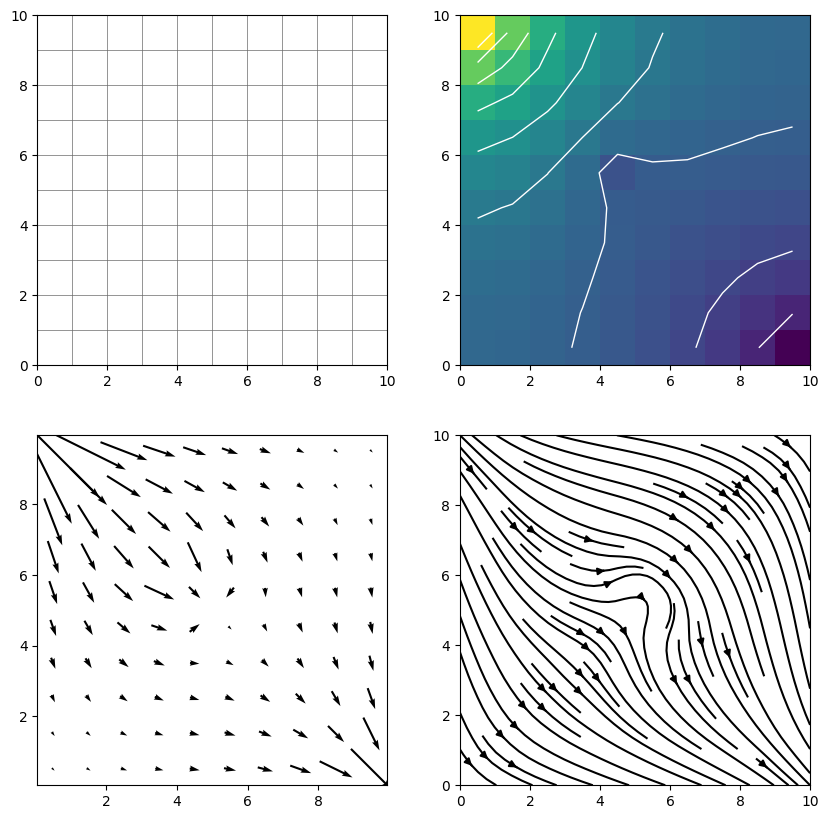

In [32]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].set_aspect('equal')
ax[0,1].set_aspect('equal')
ax[1,0].set_aspect('equal')
ax[1,1].set_aspect('equal')

# Dibujamos la malla (con flopy)
pmv0 = flopy.plot.PlotMapView(gwf, ax=ax[0,0])
pmv0.plot_grid(colors='dimgray', lw=0.5)

# Dibujamos la carga hidráulica (con flopy)
pmv1 = flopy.plot.PlotMapView(gwf, ax=ax[0,1])
pmv1.plot_array(head)
pmv1.contour_array(head, levels=10, colors='white', linewidths=1.)

# Dibujamos la carga velocidad (con flopy)
pmv2 = flopy.plot.PlotMapView(gwf, ax=ax[1,0])
pmv2.plot_vector(qx, qy, normalize=False, color="k")

# Matplotlib para dibujar streamlines
Lx = nrow
Ly = ncol
delc = Lx / ncol
delr = Ly / nrow
# Malla donde se dibuja la velocidad
x = np.linspace(0, Lx, ncol)
y = np.linspace(0, Ly, nrow)
xg, yg = np.meshgrid(x,y)
ax[1,1].streamplot(xg,yg,qx[0],qy[0], color='k')
ax[1,1].set_xlim((0,Lx))
ax[1,1].set_ylim(0,Ly)